# show we are outside 1SD because of random variability

In [36]:
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
NMC = 10000
orig_n = 1000

In [8]:
# doesn't work with just one probability!
rv_test = pd.DataFrame(scipy.stats.multinomial.rvs(10, p = [0.8, .2], size= 10, random_state=None))
print(rv_test)


    0  1
0   8  2
1   7  3
2   9  1
3  10  0
4   8  2
5   6  4
6   9  1
7   8  2
8   9  1
9   8  2


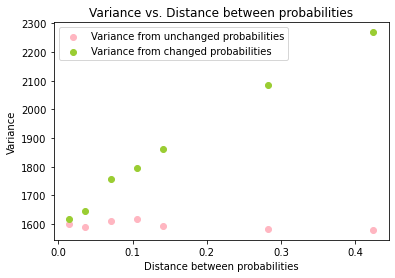

In [35]:
# plot change in variance vs. change in probability
NMC = 10000
orig_n = 10000

probability_diffs = [0.01, .025, .05, .075, .1, .2, .3]
dists = []
variance1 = []
variance2 = []

for diff  in probability_diffs:
    rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
    rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8-diff/2, .05+diff, .15-diff/2], size= NMC, random_state=None))
    
    # calculate distance between the two probability vectors
    p1 = np.array([0.8, .05, .15])
    p2 = np.array([0.8-diff, .05+diff, .15])
    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    dists.append(dist)

    variance1.append(rv1.var()[0]) # gives a list of 3 variances. the first one corresp to .8 . and .8-diff, so we want to look at that one specifically
    variance2.append(rv2.var()[0])

plt.scatter(dists, variance1, c='lightpink')
plt.scatter(dists, variance2, c='yellowgreen')
plt.xlabel("Distance between probabilities")
plt.ylabel("Variance")
plt.title("Variance vs. Distance between probabilities")
plt.legend(["Variance from unchanged probabilities", "Variance from changed probabilities"])

changing probs

In [40]:
# same probs

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  799.9112  799.9464 -0.0352  163.602475  158.281355  12.790718  12.580992
1   50.0616   50.0883 -0.0267   48.242430   47.382441   6.945677   6.883490
2  150.0272  149.9653  0.0619  129.482408  123.538650  11.379034  11.114794


In [42]:
# same probs (but now different than prev)

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.7, .1, .2], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.7, .1, .2], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  700.1041  699.8553  0.2488  207.236987  207.219084  14.395728  14.395106
1  100.0939  100.0307  0.0632   90.057889   90.760434   9.489883   9.526827
2  199.8020  200.1140 -0.3120  159.583554  159.939398  12.632638  12.646715


In [42]:
# now each with different probabilities: difference of .01

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.79, .06, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  800.1224  789.9894  10.1330  159.435362  166.047692  12.626772  12.885949
1   49.9759   60.0784 -10.1025   46.724592   55.388992   6.835539   7.442378
2  149.9017  149.9322  -0.0305  127.527590  129.300333  11.292811  11.371030


In [41]:
# now each with different probabilities: difference of .01

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.79, .05, .16], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  800.0265  790.0972  9.9293  158.961494  165.313684  12.607993  12.857437
1   49.9385   49.9545 -0.0160   46.889807   47.622992   6.847613   6.900941
2  150.0350  159.9483 -9.9133  126.617437  134.612288  11.252441  11.602254


In [43]:
# difference of .025

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.775, .05, .175], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  800.0348  774.9183  25.1165  161.351324  174.897515  12.702414  13.224882
1   49.8931   49.9913  -0.0982   46.473720   47.185143   6.817164   6.869144
2  150.0721  175.0904 -25.0183  129.076809  143.884616  11.361198  11.995191


In [88]:
# difference of .025

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.775, .075, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2      diff        var 1        var 2       sd 1  \
0  8000.0443  7749.5293  250.5150  1578.689406  1740.869428  39.732725   
1   499.6393   750.3215 -250.6822   468.266422   682.004738  21.639464   
2  1500.3164  1500.1492    0.1672  1262.850576  1282.517991  35.536609   

        sd 2  
0  41.723727  
1  26.115220  
2  35.812260  


In [69]:
# difference of .05. diff not within var for 0

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.85, 0, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2      diff        var 1        var 2       sd 1  \
0  8000.6014  8500.1081 -499.5067  1596.755594  1276.900704  39.959424   
1   500.0270     0.0000  500.0270   471.611432     0.000000  21.716616   
2  1499.3716  1499.8919   -0.5203  1279.283842  1276.900704  35.767078   

        sd 2  
0  35.733747  
1   0.000000  
2  35.733747  


In [65]:
# difference of .05

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.85, .05, .1], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2      diff        var 1        var 2       sd 1  \
0  7999.3559  8500.1327 -500.7768  1593.043740  1241.639055  39.912952   
1   500.0954   499.9841    0.1113   475.639463   466.697517  21.809160   
2  1500.5487   999.8832  500.6655  1279.498178   879.276685  35.770074   

        sd 2  
0  35.236899  
1  21.603183  
2  29.652600  


In [44]:
# difference of .05

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.75, .05, .2], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  799.9330  750.3154  49.6176  158.596171  183.828506  12.593497  13.558337
1   50.0197   49.7846   0.2351   47.431655   46.868890   6.887064   6.846086
2  150.0473  199.9000 -49.8527  125.804243  158.338034  11.216249  12.583244


In [86]:
# difference of .05: diff exceeds var 1 but not var 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.75, .1, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2      diff        var 1        var 2       sd 1  \
0  7999.8357  7500.9991  498.8366  1623.868892  1900.534353  40.297257   
1   500.0914   999.4294 -499.3380   485.985645   920.797295  22.045082   
2  1500.0729  1499.5715    0.5014  1259.052691  1295.929481  35.483132   

        sd 2  
0  43.595118  
1  30.344642  
2  35.999021  


In [45]:
# difference of .075

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.725, .05, .225], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  799.9483  724.9271  75.0212  162.377065  201.920378  12.742726  14.209869
1   50.0126   49.9354   0.0772   46.814923   47.540781   6.842143   6.894982
2  150.0391  225.1375 -75.0984  128.017373  176.827276  11.314476  13.297642


In [84]:
# difference of .075: diff exceeds var 1 but not var 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.725, .125, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2     diff        var 1        var 2       sd 1  \
0  8000.2807  7249.5967  750.684  1586.014709  1963.931442  39.824800   
1   499.6009  1249.8499 -750.249   469.920411  1102.186189  21.677648   
2  1500.1184  1500.5534   -0.435  1296.879669  1269.303479  36.012216   

        sd 2  
0  44.316266  
1  33.199190  
2  35.627286  


In [46]:
# difference of .1

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.7, .05, .25], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  799.8512  700.0974  99.7538  161.830042  208.916005  12.721244  14.453927
1   49.9704   49.9863  -0.0159   46.213145   47.272040   6.798025   6.875466
2  150.1784  249.9163 -99.7379  126.535827  190.331727  11.248814  13.796077


In [82]:
# difference of .1: diff exceeds var 1 but not var 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.7, .15, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2       diff        var 1        var 2       sd 1  \
0  8000.0183  6999.9903  1000.0280  1574.645830  2103.497956  39.681807   
1   499.9354  1499.9672 -1000.0318   475.516378  1264.042328  21.806338   
2  1500.0463  1500.0425     0.0038  1268.981254  1291.494443  35.622763   

        sd 2  
0  45.863907  
1  35.553373  
2  35.937368  


In [47]:
# difference of .2: diff exceeds var 1 but not var 2

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.6, .05, .35], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2      diff       var 1       var 2       sd 1       sd 2
0  800.0004  600.0612  199.9392  158.525852  240.821537  12.590705  15.518426
1   50.0108   49.9755    0.0353   48.182302   48.150715   6.941347   6.939072
2  149.9888  349.9633 -199.9745  126.284703  228.609614  11.237647  15.119842


In [76]:
# difference of .2: diff exceeds var 1 and 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.6, .25, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2       diff        var 1        var 2       sd 1  \
0  8000.6567  6000.3450  2000.3117  1589.215567  2380.686044  39.864967   
1   499.7472  2500.2229 -2000.4757   481.774670  1855.012917  21.949366   
2  1499.5961  1499.4321     0.1640  1262.716636  1261.593749  35.534724   

        sd 2  
0  48.792274  
1  43.069861  
2  35.518921  


In [78]:
# difference of .3: diff exceeds var 1 and 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.5, .35, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

      mean 1     mean 2       diff        var 1        var 2       sd 1  \
0  8000.2488  5000.7158  2999.5330  1614.070506  2497.129343  40.175496   
1   500.0895  3499.2619 -2999.1724   487.519842  2276.198128  22.079851   
2  1499.6617  1500.0223    -0.3606  1301.865040  1292.565659  36.081367   

        sd 2  
0  49.971285  
1  47.709518  
2  35.952269  


In [48]:
# difference of .3: diff exceeds var 1 and 2

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.5, .05, .45], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2      diff       var 1       var 2       sd 1       sd 2
0  800.1116  500.1066  300.0050  160.232969  243.463983  12.658316  15.603332
1   49.9077   49.8845    0.0232   47.654146   48.566816   6.903198   6.968990
2  149.9807  450.0089 -300.0282  128.655393  242.901511  11.342636  15.585298


In [49]:
# difference of .4: exceeds var 1 and 2

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.4, .05, .55], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2      diff       var 1       var 2       sd 1       sd 2
0  799.7444  400.1374  399.6070  159.670036  237.686290  12.636061  15.417078
1   50.0989   49.9475    0.1514   48.443763   46.793623   6.960155   6.840586
2  150.1567  549.9151 -399.7584  127.029248  244.566749  11.270725  15.638630


In [81]:
# difference of .4: exceeds var 1 and 2

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.4, .45, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1     mean 2       diff        var 1        var 2       sd 1  \
0  8000.016  3999.9984  4000.0176  1593.109455  2375.148912  39.913775   
1   500.158  4499.4217 -3999.2637   479.312367  2392.989768  21.893204   
2  1499.826  1500.5799    -0.7539  1285.384862  1303.555972  35.852264   

        sd 2  
0  48.735500  
1  48.918195  
2  36.104792  


changing counts

In [45]:
# same counts

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  800.0159  800.0993 -0.0834  162.855133  156.028842  12.761471  12.491151
1   50.0347   50.0041  0.0306   47.076204   46.919775   6.861210   6.849801
2  149.9494  149.8966  0.0528  130.280068  125.933902  11.414029  11.222028


In [47]:
# same counts (but different)

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-100, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-100, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  719.8870  719.8535  0.0335  144.882319  145.154753  12.036707  12.048019
1   45.0256   45.1225 -0.0969   41.927737   42.513545   6.475163   6.520241
2  135.0874  135.0240  0.0634  115.016263  116.684492  10.724564  10.802060


In [48]:
# different counts

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-1, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  799.2387  799.8892 -0.6505  158.134736  155.253449  12.575163  12.460074
1   49.9999   50.0538 -0.0539   46.941994   47.288834   6.851423   6.876688
2  149.7614  150.0570 -0.2956  125.851055  122.859637  11.218336  11.084207


In [49]:
# even bigger difference in counts: now means start exceeding 1 SD

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-10, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  792.0254  800.0806 -8.0552  157.792934  157.235227  12.561566  12.539347
1   49.3760   49.9842 -0.6082   47.012325   46.383589   6.856553   6.810550
2  148.5986  149.9352 -1.3366  127.528231  122.931694  11.292840  11.087457


In [50]:
# even bigger difference in counts

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-100, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff       var 1       var 2       sd 1       sd 2
0  719.9739  799.9271 -79.9532  142.930912  156.720658  11.955372  12.518812
1   45.0117   50.0293  -5.0176   42.831246   46.011243   6.544559   6.783159
2  135.0144  150.0436 -15.0292  112.599053  123.606660  10.611270  11.117853


In [57]:
# even bigger difference in counts

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-500, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff      var 1       var 2      sd 1       sd 2
0  400.1302  799.9922 -399.862  80.112259  162.319571  8.950545  12.740470
1   24.9897   50.0287  -25.039  24.212215   47.699646  4.920591   6.906493
2   74.8801  149.9791  -75.099  62.558380  129.770440  7.909386  11.391683


both  probabilities and counts

In [53]:
# same probs and counts

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  799.9195  799.9500 -0.0305  161.661386  156.373337  12.714613  12.504933
1   50.0866   49.9296  0.1570   47.331834   47.289973   6.879813   6.876771
2  149.9939  150.1204 -0.1265  128.755938  124.342138  11.347067  11.150881


In [54]:
# same probs and counts (but different than prev)

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-100, p = [0.7, .05, .25], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-100, p = [0.7, .05, .25], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2    diff       var 1       var 2       sd 1       sd 2
0  629.9140  629.9562 -0.0422  190.797684  186.555337  13.812953  13.658526
1   45.0386   45.0628 -0.0242   43.219832   43.026959   6.574179   6.559494
2  225.0474  224.9810  0.0664  171.019855  167.461585  13.077456  12.940695


In [55]:
# diff probs and counts: here differences already start to go over 1SD away

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-1, p = [0.9, .05, .05], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2     diff      var 1       var 2      sd 1       sd 2
0  898.9471  800.0584  98.8887  89.689471  159.565946  9.470452  12.631941
1   50.0377   50.0131   0.0246  46.495128   47.838312  6.818734   6.916525
2   50.0152  149.9285 -99.9133  47.636133  126.869475  6.901893  11.263635


In [56]:
# diff probs and counts: here differences already start to go over 1SD away

NMC = 10000

rv1 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n-10, p = [0.9, .05, .05], size= NMC, random_state=None))
rv2 = pd.DataFrame(scipy.stats.multinomial.rvs(orig_n, p = [0.8, .05, .15], size= NMC, random_state=None))

print(pd.DataFrame({
    "mean 1":rv1.mean(axis=0),
    "mean 2":rv2.mean(axis=0),
    "diff":rv1.mean(axis=0) - rv2.mean(axis=0),
    "var 1":rv1.var(axis=0),
    "var 2":rv2.var(axis=0),
    "sd 1":np.sqrt(rv1.var(axis=0)),
    "sd 2":np.sqrt(rv2.var(axis=0)),
}))

     mean 1    mean 2      diff      var 1       var 2      sd 1       sd 2
0  890.9991  799.9436   91.0555  90.242923  160.880707  9.499628  12.683876
1   49.5301   49.9903   -0.4602  46.933787   46.874893  6.850824   6.846524
2   49.4708  150.0661 -100.5953  46.884036  129.450476  6.847192  11.377631


In [63]:
android = pd.read_csv("/Users/hlim/Desktop/e-mission-eval-private-data/Error_bars/MobilityNetCMs/mobilitynet_android.csv", index_col=0).T
ios = pd.read_csv("/Users/hlim/Desktop/e-mission-eval-private-data/Error_bars/MobilityNetCMs/mobilitynet_ios.csv", index_col=0).T

android = (android / android.sum(axis=0)).sort_index()
android = android.reindex(sorted(android.columns), axis=1)
ios = (ios / ios.sum(axis=0)).sort_index()
ios = ios.reindex(sorted(ios.columns), axis=1)

print(android)
print(ios)

android.to_csv("/Users/hlim/Desktop/e-mission-eval-private-data/Error_bars/MobilityNetCMs/column_norm_mobilitynet_android.csv")
ios.to_csv("/Users/hlim/Desktop/e-mission-eval-private-data/Error_bars/MobilityNetCMs/column_norm_mobilitynet_ios.csv")

              AIR_OR_HSR  BICYCLING       BUS       CAR  LIGHT_RAIL  \
BICYCLING       0.000000   0.136611  0.000000  0.000280    0.000000   
BUS             0.306660   0.115971  0.614115  0.134201    0.000000   
CAR             0.000000   0.205515  0.000000  0.544690    0.000000   
ESCOOTER        0.000000   0.187213  0.017918  0.000000    0.000000   
E_BIKE          0.127029   0.079278  0.058719  0.040076    0.000000   
LIGHT_RAIL      0.000000   0.028542  0.015749  0.004848    0.038475   
NO_GT_END       0.000000   0.000000  0.000000  0.000000    0.000000   
NO_GT_MIDDLE    0.003941   0.016071  0.014378  0.008629    0.001101   
NO_GT_START     0.000000   0.000000  0.000000  0.004265    0.000000   
SUBWAY          0.531329   0.137379  0.032420  0.048840    0.000000   
TRAIN           0.000000   0.048134  0.232717  0.210594    0.960424   
WALKING         0.031041   0.045285  0.013985  0.003577    0.000000   

              NO_SENSED_END  NO_SENSED_MIDDLE  NO_SENSED_START    SUBWAY  \
